# Purpose: Fit cumulative volcanic forcing to integrals of logistic functions

Clear all variables and reset the working directory and import necessary libraries

In [1]:
%reset -f
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import csv
import scipy
import bisect
import sympy as sp
from sympy import integrate, erf, exp, sin, log, oo, pi, sinh, symbols,simplify,expand,expand_power_exp,expand_log
os.chdir('C:\\Users\\cd7\\Desktop\\Heat17Volcanoes')

Read the specified input file

In [2]:
df1 = pd.read_excel('heat17volcanoshield491bc-2011dec28.xlsx')
df1.to_csv('VolForcings.csv',header=False,index=False)
df1 = pd.read_csv('VolForcings.csv')
df1.drop(df1.tail(1).index,inplace=True) # drop last 5 rows

Assign the year values and radiative forcings data

In [3]:
yrsall = df1.iloc[:,0:1]
forceall = df1.iloc[:,1:2]
print (yrsall)
print (forceall)
newyrsall = yrsall['Julian'].tolist()
newyrsall = list(map(float, newyrsall))
newyrsall = [x -200 for x in newyrsall]
sorted(newyrsall) # sorted list
ndrop1 = bisect.bisect(newyrsall, 0) # find the index of the first positive value in a sorted list

     Julian
0      -491
1      -487
2      -478
3      -465
4      -434
5      -430
6      -426
7      -418
8      -413
9      -403
10     -396
11     -392
12     -385
13     -376
14     -362
15     -356
16     -352
17     -346
18     -339
19     -331
20     -329
21     -326
22     -301
23     -299
24     -293
25     -279
26     -255
27     -247
28     -244
29     -228
..      ...
256    1823
257    1832
258    1836
259    1846
260    1853
261    1856
262    1862
263    1873
264    1875
265    1884
266    1887
267    1890
268    1903
269    1908
270    1912
271    1919
272    1925
273    1926
274    1931
275    1943
276    1947
277    1957
278    1964
279    1968
280    1979
281    1982
282    1992
283  2008.6
284  2009.4
285  2011.5

[286 rows x 1 columns]
               Wyr/(m*m)
0      4.064215326656395
1     0.4380161394453005
2      1.414576712634823
3     3.6908245192604006
4     3.2240860100154087
5     0.9837411656394455
6     25.591631491525426
7    0.39493258474576276
8     0

     Julian
0       206
1       215
2       218
3       226
4       230
5       236
6       244
7       266
8       281
9       299
10      304
11      307
12      310
13      332
14      345
15      353
16      358
17      360
18      366
19      369
20      379
21      388
22      393
23      411
24      418
25      423
26      426
27      433
28      452
29      456
..      ...
190    1823
191    1832
192    1836
193    1846
194    1853
195    1856
196    1862
197    1873
198    1875
199    1884
200    1887
201    1890
202    1903
203    1908
204    1912
205    1919
206    1925
207    1926
208    1931
209    1943
210    1947
211    1957
212    1964
213    1968
214    1979
215    1982
216    1992
217  2008.6
218  2009.4
219  2011.5

[220 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
               Wyr/(m*m)
0     2.0177464784283514
1    0.24414014329738062
2     1.3499513805855161
3     0.8185875392912173
4    0.44519673189522346
5      3.841616960708783
6     0.90475464869

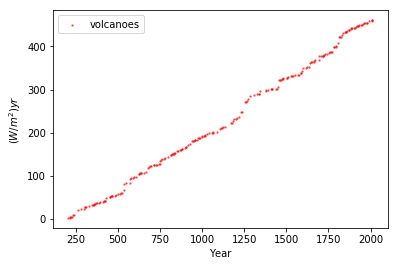

In [4]:
# yrsq = yrsall.drop(yrsall.head(ndrop1).index, inplace=True)
yrsad = yrsall.iloc[ndrop1:]
# print (yrsall)
# print (type(yrsall))
yrsad.index = np.arange(0, len(yrsad))
print (yrsad)
print (type(yrsad))

forcead = forceall.iloc[ndrop1:]
forcead.index = np.arange(0, len(forcead))
print (forcead)

forcead = forcead['Wyr/(m*m)'].tolist()
forcead = list(map(float, forcead))
sumforcead = np.cumsum(forcead)
print (sumforcead)

sumforcead = list(map(str, sumforcead))
sumforcead = pd.DataFrame({'Wyr/(m*m)':sumforcead})
df2 = pd.merge(yrsad,sumforcead, left_index =True, right_index =True,how='outer')
df2 = df2.astype(float)
df2.plot.scatter(x="Julian", y="Wyr/(m*m)", color = 'r',label ='volcanoes', s=2, alpha = 0.5)
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('$(W/m^2)yr$') 
plt.savefig('volcanoes.eps',dpi=1000)
plt.savefig('volcanoes.pdf',dpi=1000)
plt.show()


Define the linear fitted of data

In [5]:
# pd.to_numeric(yrsad, downcast='float')
# yrsad.Julian = yrsad.Julian.astype(float)
# yrsad = yrsad.iloc[:,0]
yrsad = df2.iloc[:,0]
yrsad = yrsad.tolist()
sumforcead = df2.iloc[:,1]
sumforcead = sumforcead.tolist()
# print (type(yrsad))
# yrsad = pd.to_numeric(yrsad, downcast='float')
# print (yrsad)

# sumforcead = sumforcead.iloc[:,0]
# print (type(yrsad))
# sumforcead = pd.to_numeric(sumforcead, downcast='float')
# print (sumforcead)

def linear(t,a1,a2):
     y = a1*t+a2
     return y
param_bounds=([0,-100],[0.5,0])
popt,pcov = curve_fit(linear, yrsad, sumforcead, bounds=param_bounds)
print (popt)

[  0.26105566 -65.00829406]


160
[1601.0, 1619.0, 1621.0, 1637.0, 1641.0, 1646.0, 1654.0, 1662.0, 1667.0, 1673.0, 1693.0, 1695.0, 1708.0, 1719.0, 1720.0, 1721.0, 1725.0, 1729.0, 1739.0, 1756.0, 1762.0, 1766.0, 1770.0, 1783.0, 1786.0, 1796.0, 1797.0, 1809.0, 1815.0, 1821.0, 1823.0, 1832.0, 1836.0, 1846.0, 1853.0, 1856.0, 1862.0, 1873.0, 1875.0, 1884.0, 1887.0, 1890.0, 1903.0, 1908.0, 1912.0, 1919.0, 1925.0, 1926.0, 1931.0, 1943.0, 1947.0, 1957.0, 1964.0, 1968.0, 1979.0, 1982.0, 1992.0, 2008.6, 2009.4, 2011.5]
[8.315126057010787, 0.344668437596302, 1.2422424938366718, 0.7180592449922959, 8.501821460708783, 1.3714931579352851, 1.0627276825885978, 0.5816279884437597, 1.6730780408320496, 2.23316425192604, 0.9909217580893682, 7.352926668721111, 0.5744473959938368, 0.2944042904468413, 0.4739191016949153, 0.6031697657935285, 0.3662102149460709, 2.276247806625578, 1.6946198181818182, 0.6390727280431434, 2.5275685423728818, 1.0124635354391371, 0.45237732434514644, 11.122737704930664, 0.6318921355932204, 0.45237732434514644,

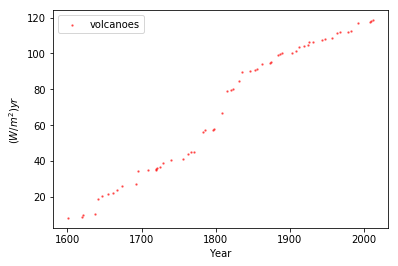

In [6]:
yrsad = list(map(float, yrsad))
yrsq = [x -1600 for x in yrsad]
# yrsq = [x -1649 for x in yrsad]
sorted(yrsq) # sorted list
ndrop2 = bisect.bisect(yrsq, 0) # find the index of the first positive value in a sorted list
print(ndrop2)

yrs = yrsad[ndrop2:]
print(yrs)

force  = forcead[ndrop2:]
print(force)

sumforce = np.cumsum(force)
print (sumforce)
yrs = list(map(str, yrs))
yrs = pd.DataFrame({'Year':yrs})
sumforce = list(map(str, sumforce))
sumforce = pd.DataFrame({'Wyr/(m*m)':sumforce})

df3 = pd.merge(yrs,sumforce, left_index =True, right_index =True,how='outer')
df3 = df3.astype(float)
df3.plot.scatter(x="Year", y="Wyr/(m*m)", color = 'r',label ='volcanoes', s=2, alpha = 0.5)
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('$(W/m^2)yr$') 
plt.savefig('volcanoes1.eps',dpi=1000)
plt.savefig('volcanoes1.pdf',dpi=1000)
plt.show()




In [7]:
yrs = df3.iloc[:,0]
yrs = yrs.tolist()
yrsqq = [x -1749 for x in yrs]
sorted(yrsqq) 
# position = bisect.bisect_left(yrsqq, 0)
# position = bisect.bisect_right(yrsqq, 0)
position = bisect.bisect(yrsqq, 0)
print (position)

yrs[position-1]

19


1739.0

Average volcanic shielding W/(m*m) from 1654 through 1756.

In [8]:
print (yrs)
yrsp = yrs[0:position]
# yrsp = yrs[0:position+1]
print (yrsp)
sumforce = df3.iloc[:,1]
sumforce = sumforce.tolist()
# sumforcep = sumforce[0:position+1]
sumforcep = sumforce[0:position]
print (sumforcep)
def linear1(t,b1,b2):
    y = b1*t+b2
    return y
param_bounds=([0,-500],[0.5,500])
popt1,pcov1 = curve_fit(linear1, yrsp, sumforcep, bounds=param_bounds)
print (popt1)
print (sumforcep)

[1601.0, 1619.0, 1621.0, 1637.0, 1641.0, 1646.0, 1654.0, 1662.0, 1667.0, 1673.0, 1693.0, 1695.0, 1708.0, 1719.0, 1720.0, 1721.0, 1725.0, 1729.0, 1739.0, 1756.0, 1762.0, 1766.0, 1770.0, 1783.0, 1786.0, 1796.0, 1797.0, 1809.0, 1815.0, 1821.0, 1823.0, 1832.0, 1836.0, 1846.0, 1853.0, 1856.0, 1862.0, 1873.0, 1875.0, 1884.0, 1887.0, 1890.0, 1903.0, 1908.0, 1912.0, 1919.0, 1925.0, 1926.0, 1931.0, 1943.0, 1947.0, 1957.0, 1964.0, 1968.0, 1979.0, 1982.0, 1992.0, 2008.6, 2009.4, 2011.5]
[1601.0, 1619.0, 1621.0, 1637.0, 1641.0, 1646.0, 1654.0, 1662.0, 1667.0, 1673.0, 1693.0, 1695.0, 1708.0, 1719.0, 1720.0, 1721.0, 1725.0, 1729.0, 1739.0]
[8.315126057010787, 8.65979449460709, 9.902036988443761, 10.620096233436056, 19.12191769414484, 20.493410852080125, 21.556138534668722, 22.137766523112482, 23.81084456394453, 26.044008815870573, 27.03493057395994, 34.38785724268105, 34.96230463867489, 35.25670892912173, 35.730628030816646, 36.33379779661018, 36.70000801155625, 38.976255818181826, 40.67087563636365

In [9]:
tref = 1750
yrslate =  yrs[position:]
yrslate = [x -tref for x in yrslate]
print (yrslate)

forcelate = force[position:]
sumforcelate = np.cumsum(forcelate)

yrslate = list(map(str, yrslate))
yrslate = pd.DataFrame({'Year':yrslate})
sumforcelate = list(map(str, sumforcelate))
sumforcelate = pd.DataFrame({'Wyr/(m*m)':sumforcelate})

df4 = pd.merge(yrslate,sumforcelate, left_index =True, right_index =True,how='outer')
# pairsumlate = Partition[Riffle[yrslate, sumforcelate], 2]

yrslate = df4.iloc[:,0]
yrslate = yrslate.tolist()
yrslate = [float(i) for i in yrslate]
yrsjulian = [x + tref for x in yrslate]
print (df4)

[6.0, 12.0, 16.0, 20.0, 33.0, 36.0, 46.0, 47.0, 59.0, 65.0, 71.0, 73.0, 82.0, 86.0, 96.0, 103.0, 106.0, 112.0, 123.0, 125.0, 134.0, 137.0, 140.0, 153.0, 158.0, 162.0, 169.0, 175.0, 176.0, 181.0, 193.0, 197.0, 207.0, 214.0, 218.0, 229.0, 232.0, 242.0, 258.5999999999999, 259.4000000000001, 261.5]
                 Year           Wyr/(m*m)
0                 6.0  0.6390727280431434
1                12.0   3.166641270416025
2                16.0   4.179104805855162
3                20.0   4.631482130200308
4                33.0  15.754219835130971
5                36.0   16.38611197072419
6                46.0  16.838489295069337
7                47.0   17.35549195146379
8                59.0  25.979383483821266
9                65.0   38.33000249768875
10               71.0   38.75365745223421
11               73.0   39.37836899537751
12               82.0   44.01703171802774
13               86.0   48.73468095762712
14               96.0  49.538907312018495
15              103.0   49.96974

[6.0, 12.0, 16.0, 20.0, 33.0, 36.0, 46.0]
0.47627291282744466
<class 'float'>
13.017720375287285
[47.0, 59.0, 65.0]
[  1.10145161 -35.56111579]
1.1014516100046443
[ 0.18358638 31.19590694]
0.18358638247357967
45.5
69.0
<class 'float'>


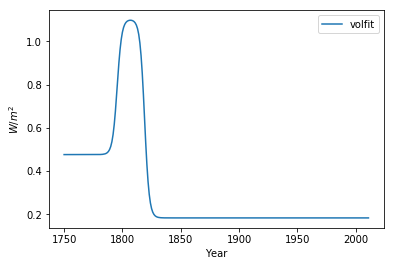

In [10]:
# yrslateq = yrslate[0:4]
# sumforcelateq = sumforcelate[0:4]

yrslateq = yrslate[0:7]
sumforcelateq = sumforcelate[0:7]
sumforcelateq = sumforcelateq['Wyr/(m*m)'].tolist()
sumforcelateq = [float(i) for i in sumforcelateq]
print (yrslateq)

def linear2(t,c1,c2):
    y = c1*t+c2
    return y
param_bounds=([0,-100],[0.5,0])
popt2,pcov2 = curve_fit(linear2, yrslateq, sumforcelateq, bounds=param_bounds)
# print (popt2)

rate1 = float(popt2[0])
# rate1 = popt2[0]
# rate1 = format(popt2[0], '.8f')
# rate1 = 0.476273
print (rate1)
print (type(rate1))

fit15 = linear2(yrslate[4],*popt2)
print (fit15)

yrslateq = yrslate[7:10]
sumforcelateq = sumforcelate[7:10]
sumforcelateq = sumforcelateq['Wyr/(m*m)'].tolist()
sumforcelateq = [float(i) for i in sumforcelateq]
print (yrslateq)

def linear3(t,c1,c2):
    y = c1*t+c2
    return y
param_bounds=([0,-100],[5,100])
popt3,pcov3 = curve_fit(linear3, yrslateq, sumforcelateq, bounds=param_bounds)
print (popt3)
rate2 = float(popt3[0])
# rate2 = 1.10145
print(rate2)

yrslateqq = yrslate[10:]
sumforcelateqq = sumforcelate[10:]
sumforcelateqq = sumforcelateqq['Wyr/(m*m)'].tolist()
sumforcelateqq = [float(i) for i in sumforcelateqq]

def linear4(t,d1,d2):
    y = d1*t+d2
    return y
param_bounds=([0,-100],[5,100])
popt4,pcov4 = curve_fit(linear4, yrslateqq, sumforcelateqq, bounds=param_bounds)
print (popt4)

rate3 = float(popt4[0])
# rate3 = 0.183586
print (rate3)

tinflect1 = -1 + (yrslate[6] + yrslate[7])/2
# tinflect1 = 45.5
print (tinflect1)
tinflect2 = 1 + (yrslate[9] + yrslate[10])/2
# tinflect2 = 69.0
print (tinflect2)
print (type(tinflect2))
# tswitch = 1
tswitch = 2

def rate(t):
    y = rate1*(1-1/(1+np.exp(-(t-tinflect1)/tswitch))) + rate2/(1+np.exp(-(t-tinflect1)/tswitch)) - rate2/(1+np.exp(-(t-tinflect2)/tswitch)) + rate3/(1+np.exp(-(t-tinflect2)/tswitch))
    return y

def ratejulian(t):
    y = rate1*(1-1/(1+np.exp(-(t-tref-tinflect1)/tswitch))) + rate2/(1+np.exp(-(t-tref-tinflect1)/tswitch)) - rate2/(1+np.exp(-(t-tref-tinflect2)/tswitch)) + rate3/(1+np.exp(-(t-tref-tinflect2)/tswitch))
    return y

t = range(tref,2012)
t = np.array(t)

y = ratejulian(t)
plt.plot(t,y, label="volfit")
plt.xlabel('Year')
plt.ylabel('$W/m^2$') 
plt.legend(loc='best')
plt.savefig('volfit1.eps',dpi=1000)
plt.savefig('volfit1.pdf',dpi=1000)
plt.show()

In [11]:
w = popt[0] - popt1[0]
# print (w)

t = symbols('t')

# intrateindef1 = integrate(rate1*(1-1/(1+exp(-(t-45.5)/tswitch))))
intrateindef1 = integrate(0.476273*(1-1/(1+exp(-(t-45.5)/tswitch))))

intrateindef2 = integrate(rate2/(1+exp(-(t-45)/tswitch)))
# intrateindef2 = integrate(1.10145161/(1+exp(-(t-45)/tswitch)))

intrateindef3 = integrate(rate2/(1+exp(-(t-69)/tswitch)))

intrateindef4 = integrate(rate3/(1+exp(-(t-69)/tswitch)))

intrateindef = intrateindef1 + intrateindef2 - intrateindef3 + intrateindef4
# print(intrateindef)

intrate0 = intrateindef.subs({t:6}).evalf()
# print (intrate0)

intrate = intrateindef - intrate0 - forcelate[0]
intrate = expand_power_exp(intrate)
print (intrate)

tj = symbols('tj')
intratejulian = intrate.subs({t:tj-tref}).evalf()
# print (intratejulian)
print (intratejulian.subs({tj:1756}).evalf())
print (intratejulian.subs({tj:1754}).evalf())
print (intratejulian.subs({tj:1752}).evalf())

0.18358638247358*t - 0.952546*log(1.31765142700955e-10 + 1.0*exp(-t/2)) + 2.20290322000929*log(1.0 + 1.0*exp(45/2)*exp(-t/2)) - 1.83573045506213*log(1.0 + 1.0*exp(69/2)*exp(-t/2)) + 10.2706675164263
-0.639072728043166
-1.59161873118166
-2.54416473233625


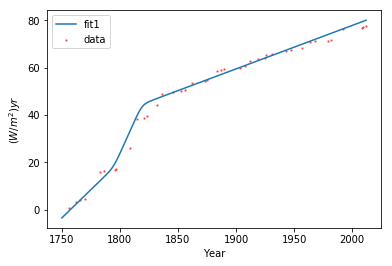

In [12]:
bg = [] # results from intratejulian
for m in range(tref,2013):
    x = intratejulian.subs({tj:m}).evalf()
#     bg.append(float(x))
    bg.append(x)
# print (bg)

tj = list(range(tref,2013))
plt.plot(tj,bg,label ='fit1')
plt.xlabel('Year')
plt.ylabel('$(W/m^2)yr$')

sumforcelate = df4.iloc[:,1]
sumforcelate = sumforcelate.tolist()
sumforcelate = [float(i) for i in sumforcelate]
plt.scatter(yrsjulian,sumforcelate,s=2,color = 'r', alpha = 0.5,label ='data',marker='o')

plt.legend(loc='best')
plt.savefig('volcanoff.eps',dpi=1000)
plt.savefig('volcanoff.pdf',dpi=1000)
plt.show()